In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

sns.set_theme()

In [23]:
import os

PLOT_DIR = "example-plots"

if not(os.path.exists(PLOT_DIR)):
    os.mkdir(PLOT_DIR)

In [24]:
# Load data
results_files = [
    "20211013-124531-benchnullary.csv"
#     "20211012-102647.csv"
#     "20211007-135249.csv",
#     "20211007-084741.csv", # benchsym switch backend
#     "20211006-143434.csv", # more problem swtich backend
#     "20210915-111700.csv",
#     "results-compilespace.csv",
]

df_raw = pd.concat(map(lambda f: pd.read_csv(f"results/{f}"), results_files), ignore_index=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Benchmark                    30 non-null     object 
 1   Mode                         30 non-null     object 
 2   Threads                      30 non-null     int64  
 3   Samples                      30 non-null     int64  
 4   Score                        30 non-null     float64
 5   Score Error (99.9%)          30 non-null     float64
 6   Unit                         30 non-null     object 
 7   Param: metaborgVersion       30 non-null     object 
 8   Param: optimisationLevel     30 non-null     int64  
 9   Param: problemSize           30 non-null     int64  
 10  Param: sharedConstructors    30 non-null     object 
 11  Param: switchImplementation  30 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.9+ KB


In [25]:
for col in ["Score", "Score Error (99.9%)"]:
    if col in df_raw and df_raw[col].dtype == object:
        df_raw[col] = df_raw[col].map(lambda s: s.replace(',', '.'), na_action="ignore").astype(float)

# df_raw

In [26]:
df_raw["Param: optimisationLevel"] = df_raw["Param: optimisationLevel"].astype("string")

In [27]:
df = df_raw[df_raw.Benchmark.str.endswith("jfr") == False].copy()
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize,Param: sharedConstructors,Param: switchImplementation
0,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.555012,0.147410,s/op,2.6.0-SNAPSHOT,4,10,on,elseif
1,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.685419,0.617366,s/op,2.6.0-SNAPSHOT,4,10,on,nested-switch
2,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.558230,0.106747,s/op,2.6.0-SNAPSHOT,4,10,on,hash-switch
3,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.678474,0.533898,s/op,2.6.0-SNAPSHOT,4,20,on,elseif
4,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.596393,0.211291,s/op,2.6.0-SNAPSHOT,4,20,on,nested-switch
5,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,1.180779,1.208701,s/op,2.6.0-SNAPSHOT,4,20,on,hash-switch
6,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,1.179868,1.861906,s/op,2.6.0-SNAPSHOT,4,30,on,elseif
7,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.741868,0.582740,s/op,2.6.0-SNAPSHOT,4,30,on,nested-switch
8,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.972870,1.425853,s/op,2.6.0-SNAPSHOT,4,30,on,hash-switch
9,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.728330,0.692608,s/op,2.6.0-SNAPSHOT,4,40,on,elseif


In [28]:
df["Stage"] = df["Benchmark"].str.rpartition('.')[2]
df["Problem"] = df["Benchmark"].str.split('.').map(lambda l: l[-2])
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize,Param: sharedConstructors,Param: switchImplementation,Stage,Problem
0,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.555012,0.147410,s/op,2.6.0-SNAPSHOT,4,10,on,elseif,run,BenchNullary
1,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.685419,0.617366,s/op,2.6.0-SNAPSHOT,4,10,on,nested-switch,run,BenchNullary
2,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.558230,0.106747,s/op,2.6.0-SNAPSHOT,4,10,on,hash-switch,run,BenchNullary
3,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.678474,0.533898,s/op,2.6.0-SNAPSHOT,4,20,on,elseif,run,BenchNullary
4,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.596393,0.211291,s/op,2.6.0-SNAPSHOT,4,20,on,nested-switch,run,BenchNullary
5,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,1.180779,1.208701,s/op,2.6.0-SNAPSHOT,4,20,on,hash-switch,run,BenchNullary
6,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,1.179868,1.861906,s/op,2.6.0-SNAPSHOT,4,30,on,elseif,run,BenchNullary
7,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.741868,0.582740,s/op,2.6.0-SNAPSHOT,4,30,on,nested-switch,run,BenchNullary
8,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.972870,1.425853,s/op,2.6.0-SNAPSHOT,4,30,on,hash-switch,run,BenchNullary
9,benchmark.stratego2.execution.BenchNullary.run,ss,1,5,0.728330,0.692608,s/op,2.6.0-SNAPSHOT,4,40,on,elseif,run,BenchNullary


In [29]:
program_text = """
module calls

imports libstrategolib

signature

sorts
   S

constructors
   nullary_constructor : S 
   unary_constructor : S -> S 
   nary_constructor : S * S * S -> S 
   nullary_function : S 
   unary_function : S -> S 
   nary_function : S * S * S -> S 
   a : S 
   b : S 
   c : S 
   d : S 
   e : S 
   f : S 

rules
   REC_E: nullary_function() -> nullary_constructor()
   REC_E: unary_function (x) -> unary_constructor (x)
   REC_E: nary_function (x, y, z) -> nary_constructor (x, y, z)
   REC_E: a() -> nullary_constructor()
   REC_E: b() -> unary_constructor (nullary_constructor())
   REC_E: c() -> nary_constructor (nullary_constructor(), nullary_constructor(), nullary_constructor())
   REC_E: d() -> nullary_function()
   REC_E: e() -> unary_function (nullary_function())
   REC_E: f() -> nary_function (nullary_function(), nullary_function(), nullary_function())

strategies
   eval = memo (innermost (REC_E))
   eval-and-print = eval ; debug (!"result = ")
   main = 
      (<eval-and-print> nullary_constructor()) ;
      (<eval-and-print> unary_constructor (nullary_constructor())) ;
      (<eval-and-print> nary_constructor (nullary_constructor(), nullary_constructor(), nullary_constructor())) ;
      (<eval-and-print> nullary_function()) ;
      (<eval-and-print> unary_function (nullary_function())) ;
      (<eval-and-print> nary_function (nullary_function(), nullary_function(), nullary_function())) ;
      <exit> 0

"""

In [30]:
df["Param: problemSize"].astype("str").mask(df["Param: problemSize"]==-1, "")

0      10
1      10
2      10
3      20
4      20
5      20
6      30
7      30
8      30
9      40
10     40
11     40
12     50
13     50
14     50
15     60
16     60
17     60
18     70
19     70
20     70
21     80
22     80
23     80
24     90
25     90
26     90
27    100
28    100
29    100
Name: Param: problemSize, dtype: object

In [32]:
import re
import os

# Add number of unique constructors to problems
# cons_regex_pat = r"\bconstructors\b\W*(?:\s*(\w*)\s*:.*\s*)*\W*\brules\b"

cons_area_regex = r"^\s*constructors\s*$((?:.*\n)*)^\s*rules\s*$"
cons_area_pat = re.compile(cons_area_regex, re.MULTILINE)

cons_regex = r"\w+\s*:.*\S"
cons_pat = re.compile(cons_regex)

def find_constructors(p):
    cons_areas = cons_area_pat.findall(p)
    cons_groups = list(map(cons_pat.findall, cons_areas))
    conses = set().union(*cons_groups)
    return conses

def count_constructors_in_file(program_name):
    p_program = os.path.join("..", "src", "main", "resources", program_name + ".str2")
    with open(p_program, 'r') as f_program:
        contents = f_program.read()
        conses = find_constructors(contents)
        return len(conses)

df["Number of constructors"] = (df["Problem"].str.lower() + df["Param: problemSize"].astype("str").mask(df["Param: problemSize"]==-1, "")).map(count_constructors_in_file)

In [33]:
## Plot-specific settings
configs = [
    {
        "problems": {"Benchexpr", "Benchsym", "Benchtree", "Bubblesort", "Factorial", "Fibonacci", "Hanoi", "Mergesort", "Quicksort", "Sieve"},
        "stages": {"run"},
        "settings": {"yscale": "log"}
    },
    {
        # Apply to all problems
        "stages": {"compileStratego", "compileJava", "Java space", "Class space"},
        "settings": {"ylim": (0, None)}
    },
    {
        "stages": {"Java space", "Class space"},
        "settings": {"ylabel": "Size (bytes)"}
    }
]

In [34]:
from pandas.core.common import flatten

def configure_grid(g: sns.FacetGrid, problem=None):
    ## Global settings
    g.set_ylabels("Time (s)")
    g.set_xlabels("Input size")

    for ax in flatten(g.axes):
        ax.get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

    # Specific settings
    try:
        for (row_val, col_val), ax in g.axes_dict.items():
            for config in configs:
                if "problems" not in config or row_val in config["problems"]:
                    if "stages" not in config or col_val in config["stages"]:
                        ax.set(**config["settings"])
    except (ValueError):
        for col_val, ax in g.axes_dict.items():
            for config in configs:
                if "problems" not in config or problem in config["problems"]:
                    if "stages" not in config or col_val in config["stages"]:
                        ax.set(**config["settings"])
    finally:
        return g

In [35]:
df_scaledproblem = df[df["Param: problemSize"] != -1]

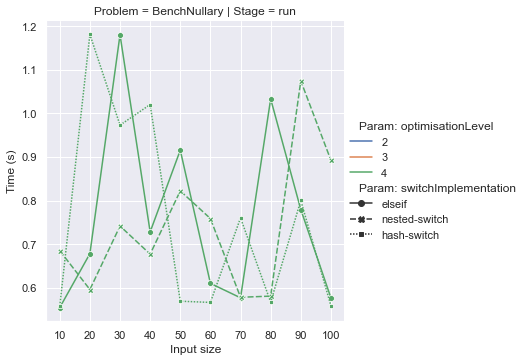

In [36]:
g = configure_grid(sns.relplot(
    data=df_scaledproblem,
    x="Param: problemSize",
    y="Score",
    row="Problem",
    row_order=np.sort(np.unique(df_scaledproblem["Problem"].values)),
    col="Stage",
    col_order=[s for s in ["compileStratego", "Java space", "compileJava", "Class space", "run"] if s in df_scaledproblem["Stage"].values],
    style="Param: switchImplementation",
    hue="Param: optimisationLevel",
    hue_order=["2", "3", "4"],
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

# TODO Include strj runtime -> with and without fusion

# Save figure to file
plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-allstages.png")

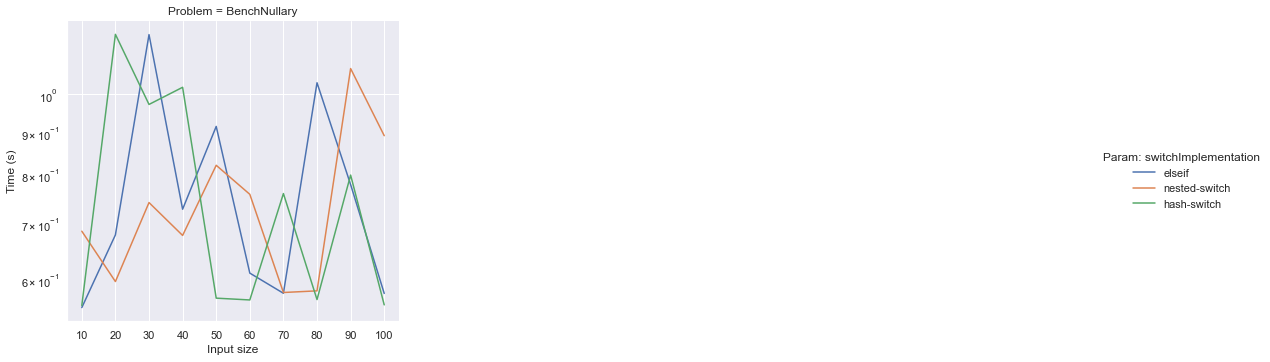

In [37]:
# Runtimes for DFA switch backends (per problem)

g = configure_grid(sns.relplot(
    data=df_scaledproblem[df_scaledproblem["Stage"] == "run"],
    x="Param: problemSize",
    y="Score",
    col="Problem",
    col_order=np.sort(np.unique(df_scaledproblem["Problem"].values)),
    col_wrap=3,
#     style="Param: switchImplementation",
    hue="Param: switchImplementation",
#     hue_order=["2", "3", "4"],
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

g.set(yscale="log")

# TODO Include strj runtime -> with and without fusion

# Save figure to file
plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-runtime.png")

In [38]:
df_ratios = df[df["Stage"] == "run"].pivot(index=["Param: switchImplementation"], columns=["Benchmark", "Param: problemSize", "Number of constructors", "Problem"], values="Score").T

# df_ratios["Ratio"] = df_ratios["elseif"] / df_ratios["switch"]
df_ratios["Ratio [nested]"] = df_ratios["nested-switch"] / df_ratios["elseif"]
df_ratios["Ratio [hash]"] = df_ratios["hash-switch"] / df_ratios["elseif"]

df_ratios.sort_values("Ratio [hash]")

# df_ratios.columns.to_series().apply(''.join)

# df[df[""]]

Param: switchImplementation                                                                              elseif  \
Benchmark                                      Param: problemSize Number of constructors Problem                  
benchmark.stratego2.execution.BenchNullary.run 80                 100                    BenchNullary  1.032933   
                                               50                 100                    BenchNullary  0.915547   
                                               30                 100                    BenchNullary  1.179868   
                                               60                 100                    BenchNullary  0.610489   
                                               100                100                    BenchNullary  0.577161   
                                               10                 100                    BenchNullary  0.555012   
                                               90                 100                    BenchNullary  0.779622   
                                               70                 100                    BenchNullary  0.577429   
                                               40                 100                    BenchNullary  0.728330   
                                               20                 100                    BenchNullary  0.678474   

Param: switchImplementation                                                                            hash-switch  \
Benchmark                                      Param: problemSize Number of constructors Problem                     
benchmark.stratego2.execution.BenchNullary.run 80                 100                    BenchNullary     0.567447   
                                               50                 100                    BenchNullary     0.569676   
                                               30                 100                    BenchNullary     0.972870   
                                               60                 100                    BenchNullary     0.566846   
                                               100                100                    BenchNullary     0.559204   
                                               10                 100                    BenchNullary     0.558230   
                                               90                 100                    BenchNullary     0.800377   
                                               70                 100                    BenchNullary     0.760537   
                                               40                 100                    BenchNullary     1.020070   
                                               20                 100                    BenchNullary     1.180779   

Param: switchImplementation                                                                            nested-switch  \
Benchmark                                      Param: problemSize Number of constructors Problem                       
benchmark.stratego2.execution.BenchNullary.run 80                 100                    BenchNullary       0.581267   
                                               50                 100                    BenchNullary       0.822331   
                                               30                 100                    BenchNullary       0.741868   
                                               60                 100                    BenchNullary       0.758939   
                                               100                100                    BenchNullary       0.892421   
                                               10                 100                    BenchNullary       0.685419   
                                               90                 100                    BenchNullary       1.074261   
                                               70                 100                    BenchNullary       0.578646   
  

In [39]:
df_ratios_flat = df_ratios.melt(value_vars=["Ratio [hash]"], value_name="Ratio", ignore_index=False)
# df_ratios_flat.index = df_ratios_flat.index.to_flat_index()
# df_ratios_flat.reset_index()
df_ratios_flat.index

MultiIndex([('benchmark.stratego2.execution.BenchNullary.run',  10, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  20, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  30, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  40, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  50, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  60, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  70, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  80, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run',  90, 100, ...),
            ('benchmark.stratego2.execution.BenchNullary.run', 100, 100, ...)],
           names=['Benchmark', 'Param: problemSize', 'Number of constructors', 'Problem'])

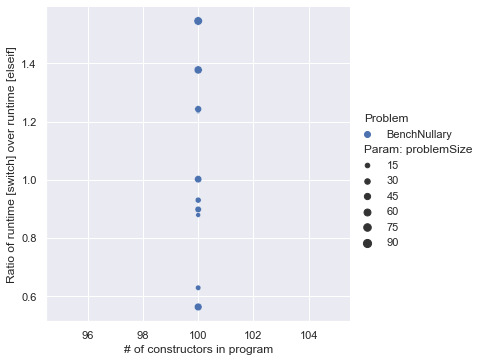

In [40]:
# Runtimes for DFA switch backends (against number of constructors)

g = configure_grid(sns.relplot(
    data=df_ratios,
    x="Number of constructors",
    y="Ratio [nested]",
    style="Problem",
    hue="Problem",
    size="Param: problemSize",
    kind="scatter",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

# g.set(yscale="log")
g.set_ylabels("Ratio of runtime [switch] over runtime [elseif]")
g.set_xlabels("# of constructors in program")

# TODO Include strj runtime -> with and without fusion

# Save figure to file
plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-backend-constructors.png")

In [ ]:
# g = sns.boxplot(
#     data=df_ratios,
#     x="Number of constructors",
#     y="Ratio",
#     hue="Problem"
# )

df_ratios.columns#.to_flat_index()
# df_ratios.columns.get_level_values(0) + '_' +  df_ratios.columns.get_level_values(1)

In [ ]:
for problem in ["Benchexpr", "Bubblesort", "Hanoi"]:
    df_problem = df_scaledproblem[df_scaledproblem["Problem"] == problem]
    
    cols = [s for s in ["compileStratego", "compileJava", "run", "Java space", "Class space"] if s in df_problem["Stage"].values]

    g = configure_grid(sns.relplot(
        data=df_problem,
        x="Param: problemSize",
        y="Score",
#         row="Problem",
#         row_order=np.sort(np.unique(df_problem["Problem"].values)),
        col_wrap=min(3, len(cols)),
        col="Stage",
        col_order=cols,
        style="Param: switchImplementation",
        hue="Param: optimisationLevel",
        hue_order=[l for l in ["2", "3", "4"] if l in df_problem["Param: optimisationLevel"].values],
        kind="line",
    #     err_style="band",
        markers=True,
        facet_kws=dict(
            sharex=False, 
            sharey=False,
        ),
    ), problem)

    # Save figure to file
    plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-{problem}.png")

In [ ]:
df_unscaledproblem = df[df["Param: problemSize"] == -1]

print(df_unscaledproblem.to_latex(
    columns=["Problem", "Stage", "Samples", "Score", "Score Error (99.9%)", "Param: optimisationLevel", "Param: switchImplementation"]
))

df_unscaledproblem